In [1]:
import math
import numpy as np
import sklearn.metrics as m
import matplotlib.pyplot as plt
rom sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_wine, load_iris
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

#### Type of Esemble : Voting, Bagging, Boosting, Stacking etc... <br>


#### Voting
- 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식.<br><br>


#### Bagging
- Bagging은 Bootstrap aggregating의 줄임말.
- Bootstrap : 모집단의 성질에 대해 표본을 통해 추정할 수 있는 것처럼, 표본의 성질에 대해서도 재표집(resampling)을 통해 추정할 수 있다는 것이다. 즉 주어진 표본에 대해서, 그 표본에서 또 다시 표본(재표본)을 여러번(1,000~10,000번, 혹은 그 이상)추출하여 표본의 평균이나 분산 등이 어떤 분포를 가지는가를 알아낼 수 있다.
- 같은 알고리즘에 대해 데이터 표본을 다르게 두고 학습을 수행해 보팅(Voting)을 수행하는 방식.
- 이 때의 데이터 표본은 중첩이 허용된다. 즉 10000개의 데이터에 대해 10개의 알고리즘이 배깅을 사용할 때,각 1000개의 데이터 내에는 중복된 데이터가 존재할 수 있다. 
- 배깅의 대표적인 방식이 Random Forest. <br><br>


#### Boosting
- 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 그 다음번 알고리즘에 가중치(Ada)를 부여하여 학습과 예측을 진행하는 방식과 잔여오차를 다시 학습(Gradient)하는 방식. <br><br>



* 부스팅 알고리즘은 대표적으로 아래와 같은 알고리즘들이 있음.
     * AdaBoost
     * Gradient Booting Machine(GBM)
     * XGBoost
     * LightGBM
     * CatBoost


- Voting
    - Hard Voting

    Classification을 예로 들어 보자면, 분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1을 최종값으로 예측을 하게됨.<br><br>
    
    - Soft Voting
    soft voting 방식은 각각의 확률의 평균 값을 계산한다음에 가장 확률이 높은 값으로 확정짓게 됩니다.
        가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면, class 0이 나올 최종 확률은 0.44, class 1이 나올 최종 확률은 0.4 가 되기 때문에 앞선 Hard Vote의 결과와는 다른 결과값으로 예측하게 됨.



In [2]:
bcancer = load_breast_cancer()
x_data  = bcancer.data
y_data  = bcancer.target
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, 
                                                    random_state=11,  stratify=y_data )

In [3]:
model_logi = LogisticRegression()
model_knn  = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()
model_vote = VotingClassifier( estimators=[ ('LogisticRegression', model_logi), 
                                           ('KNN', model_knn), ('Tree', model_tree) ] )
model_vote.fit( x_train, y_train)
cross_val =cross_validate( model_vote, x_train, y_train, cv =5)
print( cross_val )

print('='*143)
print( model_vote.predict( x_test ) )

print('='*143)
print(f'Accuracy of train data : { round(model_vote.score( x_train, y_train ), 2)*100 }%' )
print(f'Accuracy of test data  : { round(model_vote.score( x_test, y_test ),   2)*100 }%' )

{'fit_time': array([0.02792478, 0.0279243 , 0.0279243 , 0.0289216 , 0.02892303]), 'score_time': array([0.00398993, 0.00399041, 0.00399041, 0.00299287, 0.00299168]), 'test_score': array([0.93406593, 0.94505495, 0.96703297, 0.92307692, 0.94505495])}
[0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1
 0 1 0]
Accuracy of train data : 97.0%
Accuracy of test data  : 91.0%


In [4]:
print('- Result -')
for c in [ model_logi, model_knn, model_tree ]:
    c.fit( x_train, y_train )
    print('='*32)
    print( c.__class__.__name__ ,':', round( c.score( x_train, y_train ), 2)*100,'%' )
    print( c.__class__.__name__ ,':', round( c.score( x_test, y_test ), 2)*100,'%' )

- Result -
LogisticRegression : 94.0 %
LogisticRegression : 91.0 %
KNeighborsClassifier : 95.0 %
KNeighborsClassifier : 91.0 %
DecisionTreeClassifier : 100.0 %
DecisionTreeClassifier : 90.0 %


- 3개의 분류 클래스를 이용하여 Soft voting 방식으로 정확도를 구하시오.

In [5]:
wine = load_wine()
x_train, x_test, y_train, y_test = train_test_split( wine.data, wine.target, test_size=0.2, 
                                                    random_state=11,  stratify=wine.target )
model_logi = make_pipeline( StandardScaler(), LogisticRegression() )
model_knn  = make_pipeline( StandardScaler(), KNeighborsClassifier() )
model_tree = make_pipeline( StandardScaler(), DecisionTreeClassifier() )
model_vote = VotingClassifier( estimators=[ ('LogisticRegression', model_logi), 
                                           ('KNN', model_knn), ('Tree', model_tree) ], voting='soft' )

print('- Result -')
for c in [ model_logi, model_knn, model_tree, model_vote ]:
    c.fit( x_train, y_train )
    print('='*32)
    print(f'Accuracy of train data : {round( c.score( x_train, y_train ), 3)*100 }%')
    print(f'Accuracy of test data  : {round( c.score( x_test, y_test ),   3)*100 }%')

- Result -
Accuracy of train data : 100.0%
Accuracy of test data  : 97.2%
Accuracy of train data : 97.2%
Accuracy of test data  : 94.39999999999999%
Accuracy of train data : 100.0%
Accuracy of test data  : 91.7%
Accuracy of train data : 100.0%
Accuracy of test data  : 97.2%


- Bagging

In [6]:
model_pipe_knn = make_pipeline( StandardScaler(), KNeighborsClassifier() )
model_bagg     = BaggingClassifier( model_pipe_knn, n_estimators=10, max_samples=0.5 ) 
# bootstrap=True : sampling with replacement

In [7]:
model_cross    = cross_validate( model_bagg, X=x_train, y=y_train )
model_bagg.fit( x_train, y_train )
model_bagg.predict( x_test )

print(f'Accuracy of train data : {round( model_bagg.score( x_train, y_train ), 3)*100 }%')
print(f'Accuracy of test data  : {round( model_bagg.score( x_test, y_test ),   3)*100 }%')

Accuracy of train data : 96.5%
Accuracy of test data  : 94.39999999999999%


In [8]:
model_cross['test_score'].mean().round(3)

0.965

- Random Forest ( Decision Tree + Bagging )

In [9]:
forest = RandomForestClassifier()
forest.fit( x_train, y_train )
forest.predict( x_test )

array([0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2])

In [10]:
print(f'Accuracy of train data : {round( forest.score( x_train, y_train ), 3)*100 }%')
print(f'Accuracy of test data  : {round( forest.score( x_test, y_test ),   3)*100 }%')

Accuracy of train data : 100.0%
Accuracy of test data  : 97.2%


- Boosting

In [11]:
tree      = DecisionTreeClassifier( max_depth=1, criterion='entropy', random_state=1 )
model_ada = AdaBoostClassifier( tree )
model_ada.fit( x_train, y_train )
model_ada.predict( x_test )

array([1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1])

In [12]:
print(f'Accuracy of train data : {round( model_ada.score( x_train, y_train ), 3)*100 }%')
print(f'Accuracy of test data  : {round( model_ada.score( x_test, y_test ),   3)*100 }%')

Accuracy of train data : 97.2%
Accuracy of test data  : 88.9%


In [16]:
# 위에서 배운 걸 토대로 하자면 아래와 같은 방식으로 찾을 수 있음.
models = [ ('Ada', AdaBoostClassifier()),
           ('Logit', LogisticRegression()),
           ('Tree', DecisionTreeClassifier()),
           ('KNN', KNeighborsClassifier())
         ]
# model_search = make_pipeline( StandardScaler(),  models )

- Cancer data set을 이용하여 Logistic에 Bagging, Boosting을 적용하여 각각의 정확도를 구하고, ROC Curve를 그리시오.

- Bagging -
Accuracy of train data : 98.2%
Accuracy of test data  : 99.1%
--------------------------------
- Boosting -
Accuracy of train data : 98.0%
Accuracy of test data  : 100.0%


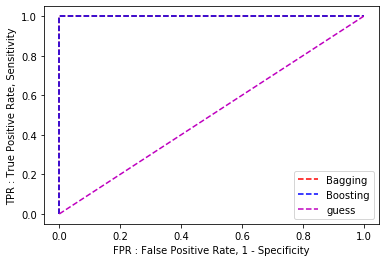

In [17]:
# 데이터 불러오기.
cancer  = load_breast_cancer()

# Boosting에서 pipelne을 통과하지 못하기 떄문에 직접 정규화.
x_data  = StandardScaler().fit_transform( cancer.data )

# Split Train data set : Test data set : 8 : 2
x_train, x_test, y_train, y_test = train_test_split( x_data, cancer.target, test_size=0.2, 
                                                    random_state=2021,  stratify=cancer.target )
# Logit model. 
model_Logit = LogisticRegression()

# Bagging model.
model_bagg  = BaggingClassifier( model_Logit, max_samples=0.5 ) 
model_bagg.fit( x_train, y_train )

# Accuracy of bagging model.
print('- Bagging -')
print('='*32)
print(f'Accuracy of train data : {round( model_bagg.score( x_train, y_train ), 3)*100 }%')
print(f'Accuracy of test data  : {round( model_bagg.score( x_test, y_test ),   3)*100 }%')
print('-'*32)

# Boosting model.
model_ada = AdaBoostClassifier( model_Logit )
model_ada.fit( x_train, y_train )

# Accuracy of Boosting model.
print('- Boosting -')
print('='*32)
print(f'Accuracy of train data : {round( model_ada.score( x_train, y_train ), 3)*100 }%')
print(f'Accuracy of test data  : {round( model_ada.score( x_test, y_test ),   3)*100 }%')\

# ROC Curve
FPR1, TPR1, Thresholds1 = m.roc_curve( y_test, model_bagg.predict_proba( x_test )[:,1] )    # Predict proba of Bagging
FPR2, TPR2, Thresholds2 = m.roc_curve( y_test, model_ada.predict_proba( x_test )[:,1] )     # Predict proba of Boosting
plt.plot( FPR1, TPR1, 'r--', label='Bagging')
plt.plot( FPR2, TPR2, 'b--', label='Boosting')
plt.plot( [0,1], [0,1], 'm--', label='guess' )
plt.xlabel( 'FPR : False Positive Rate, 1 - Specificity' ); plt.ylabel( 'TPR : True Positive Rate, Sensitivity' )
plt.legend()
plt.show()